In [1]:
import pytest
import re, os

import torch
from torch.utils.data import DataLoader
import torchvision

import modlee
from modlee import data_metafeatures as dmf
from modlee.utils import text_loaders, image_loaders

import numpy as np
import pandas as pd
import spacy

import torch_geometric
import matplotlib.pyplot as plt
import networkx as nx 
import onnx
from onnx.tools import net_drawer
import matplotlib as mpl
import copy
# import torch_geometric as pyg
import numpy as np
import torch_geometric as pyg
# from torch_geometric.utils import convert
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from transformers import GraphormerForGraphClassification
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
import argparse
import os.path as osp
import torch
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric.nn import DimeNet, DimeNetPlusPlus

DATA_ROOT = os.path.expanduser("~/efs/.data")
IMAGE_DATALOADER = modlee.utils.get_imagenette_dataloader()
# TEXT_DATALOADER = modlee.utils.get_wnli_dataloader() 


TEXT_LOADERS = {loader_fn:getattr(text_loaders, loader_fn) for loader_fn in dir(text_loaders) if re.match('get_(.*)_dataloader', loader_fn)}
IMAGE_LOADERS = [getattr(image_loaders, loader_fn) for loader_fn in dir(image_loaders) if re.match('get_(.*)_dataloader', loader_fn)]

# things to install:
# torch_geometric, pydot, transformers

/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:Operation converter registered OperationDescription(domain='', operation_type='Erf', version=13)
INFO:Operation converter registered OperationDescription(domain='', operation_type='Erf', version=9)
INFO:Operation converter registered OperationDescription(domain='', operation_type='HardSigmoid', version=6)
INFO:Operation converter registered OperationDescription(domain='', operation_type='HardSigmoid', version=1)
INFO:Operation converter registered OperationDescription(domain='', operation_type='HardSwish', version=14)
INFO:Operation converter registered OperationDescription(domain='', operation_type='LeakyRelu', version=16)
INFO:Operation converter registered OperationDescription(domain='', operation_type='Leak

 10%|█         | 10092544/99003388 [01:25<12:29, 118594.69it/s]


KeyboardInterrupt: 

In [1]:
# !pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip3 install transformers pydot torch_geometric

Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 kB/s eta 0:00:00a 0:00:01m
  Preparing metadata (setup.py) ... done
  Created wheel for torch-cluster: filename=torch_cluster-1.6.3-cp312-cp312-macosx_11_0_arm64.whl size=288891 sha256=ae8da46373162e5486abae75c82eb5c640e190bac3165667b804e8f589ed4578
  Stored in directory: /Users/modlee/Library/Caches/pip/wheels/2e/8f/d0/13408a84825c9a587151a74727b4a6d47ec67e0d625b385ad7
Successfully built torch-cluster
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /private/var/folders/yb/vk8tvh410zd8408yrm9jjsf40000gn/T/pip-req-build-6ga79c3o
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /private/var/folders/yb/vk8tvh410zd8408yrm9jjsf40000gn/T/pip-

In [ ]:
def get_imports():
    # !cat metafeatures.ipynb | grep import
    with open('./metafeatures.ipynb','r') as _f:
        l = _f.readlines()
    # print('\n'.join(l[:100]))
        
    l = [_l.strip().replace('\\n','').replace('"','').replace(',','') for _l in l if 'import' in _l]
    # print(l)
    # print('\n'.join(l))
    return '\n'.join(l)

In [2]:
mf_global = None
def get_df_from_loaders(loaders, modality, n_samples=1):
    global mf_global
    if isinstance(loaders, dict):
        loaders = list(loaders.values())
    df = pd.DataFrame()
    print(loaders)
    features = []
    MFClass = getattr(dmf, f"{modality.capitalize()}DataMetafeatures")
    for loader_fn in loaders:
        for _ in range(n_samples):
            metafeatures = MFClass(
                loader_fn(root=DATA_ROOT), testing=True
            )
            if hasattr(loader_fn, 'args'):
                dataset_name = loader_fn.args[0]
            else:
                dataset_name = loader_fn.__name__
            mf_global = metafeatures
            features.append({
                    'dataset_name':dataset_name,
                    **metafeatures.embedding,
                    **metafeatures.mfe,
                    **metafeatures.properties,
            })
            pd.DataFrame(features[-1]).to_csv(
                f'./{modality}_features_cache.csv',
                mode='a')
    df = pd.DataFrame(features)
    return df



In [6]:
text_df = get_df_from_loaders(TEXT_LOADERS, 'text')

[functools.partial(<staticmethod(<function text_loaders._get_text_dataloader at 0x7f168ef17520>)>, 'CoLA', 527), <function text_loaders.get_mnli_dataloader at 0x7f168ef175b0>, functools.partial(<staticmethod(<function text_loaders._get_text_dataloader at 0x7f168ef17520>)>, 'QNLI', 5463), functools.partial(<staticmethod(<function text_loaders._get_text_dataloader at 0x7f168ef17520>)>, 'RTE', 277), functools.partial(<staticmethod(<function text_loaders._get_text_dataloader at 0x7f168ef17520>)>, 'SST2', 872), functools.partial(<staticmethod(<function text_loaders._get_text_dataloader at 0x7f168ef17520>)>, 'STSB', 1500), functools.partial(<staticmethod(<function text_loaders._get_text_dataloader at 0x7f168ef17520>)>, 'WNLI', 71)]


In [ ]:
image_df = get_df_from_loaders(IMAGE_LOADERS[17:], 'image', n_samples=4)

In [42]:
image_df

,dataset_name,embd_0_mean_0,embd_0_mean_1,embd_0_mean_2,embd_0_mean_3,embd_0_mean_4,embd_0_mean_5,embd_0_mean_6,embd_0_mean_7,embd_0_mean_8,...,sparsity.sd_1,t_mean.mean_1,t_mean.sd_1,var.mean_1,var.sd_1,dataset_size,elem_0_shape,elem_0_dims,elem_1_shape,elem_1_dims
0,CIFAR10,-0.016777,0.681486,-1.257155,-0.762495,-1.302225,1.646449,-1.796577,-2.000172,-1.442675,...,NaN,4.783333,NaN,8.616162,NaN,10000,"[100, 3, 300, 300]",4,[100],1
1,DTD,-1.058883,0.862001,0.060573,0.420286,0.459545,0.266008,0.723380,-0.358250,-0.699077,...,NaN,21.400000,NaN,170.142525,NaN,1888,"[100, 3, 300, 300]",4,[100],1


In [13]:
# cached_df = pd.read_csv('./image_features_cache_0.csv')

class DFTransforms:
    @staticmethod
    def list_cols2item(df):
        object_columns = df.select_dtypes(include=['object']).columns
        df[object_columns] = df[object_columns].apply(
            lambda x : x[0]
        )
        return df
    
    @staticmethod
    def drop_nonnum(df):
        return df.select_dtypes(include=['float','int'])
        
    @staticmethod
    def fillna(df, val=0):
        return df.fillna(val)
    
    @staticmethod
    def dropna(df):
        return df.dropna(axis=1, how='any')

    @staticmethod
    def normalize(df):
        def min_max_normalize(column):
            return (column - column.min()) / (column.max() - column.min())
        return df.apply(min_max_normalize)

    @staticmethod
    def compose(transforms):
        def apply_transforms(df):
            for transform in transforms:
                df = transform(df)
            return df
        return apply_transforms
df_transforms = DFTransforms.compose([
    DFTransforms.list_cols2item,
    DFTransforms.drop_nonnum,
    DFTransforms.normalize,
    DFTransforms.dropna,
])
def save_labels(df, fn):
    with open(fn,'w') as _file:
        _file.write('\n'.join(list(df['dataset_name'])))

def save_tsv(df, fn):
    return df.to_csv(
        fn,
        sep='\t',
        index=False,
        header=False 
    )


In [4]:
modality = 'image'
cached_df = pd.read_csv(f'./{modality}_features_cache_0.csv')
save_labels(cached_df, f'./{modality}_labels.txt')
save_tsv(df_transforms(cached_df), f'cached_{modality}_metafeatures.tsv')
# cached_df = DFTransforms.list_cols2item(cached_df)

/tmp/ipykernel_323363/312311290.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[object_columns] = df[object_columns].apply(


In [29]:
class MFDF(pd.DataFrame):
    @property
    def name(self):
        return f'{self=}'.partition('=')[0]

    def save_labels(self, *args, **kwargs):
        save_labels(self, *args, **kwargs)
        
    def save_tsv(self, *args, **kwargs):
        save_tsv(self, *args, **kwargs)
    

In [ ]:
text_df = MFDF(pd.read_csv('./text_features_cache.csv'))
image_df = MFDF(pd.read_csv('./image_features_cache.csv'))
concat_df = MFDF(pd.concat([text_df, image_df], ignore_index=True))
# text_df.save_labels('./labels_test.txt')
print(concat_df)
print(concat_df.name)
concat_df.save_labels()

     Unnamed: 0 dataset_name  embd_mean_0  embd_mean_1  embd_mean_2  \
0           0.0         CoLA    -1.504042    -0.279320    -0.730904   
1           1.0         CoLA    -1.483405    -0.345227    -0.737107   
2           2.0         CoLA    -1.457978    -0.311558    -0.783566   
3           3.0         CoLA    -1.485049    -0.297812    -0.815689   
4           4.0         CoLA    -1.479797    -0.272896    -0.860687   
..          ...          ...          ...          ...          ...   
381        15.0      SEMEION          NaN          NaN          NaN   
382        16.0        STL10          NaN          NaN          NaN   
383        17.0        STL10          NaN          NaN          NaN   
384        18.0        STL10          NaN          NaN          NaN   
385        19.0        STL10          NaN          NaN          NaN   

     embd_mean_3  embd_mean_4  embd_mean_5  embd_mean_6  embd_mean_7  ...  \
0       0.314802    -0.043355     0.500565    -0.265383     1.232647  

In [28]:
dir(concat_df)
f'{concat_df=}'.partition('=')[0]
# print(str(concat_df))

'concat_df'

In [18]:

text_df = MFDF(df_transforms(text_df))
text_df.save_tsv('./test_text.tsv')
print(text_df)

     Unnamed: 0  embd_mean_0  embd_mean_1  embd_mean_2  embd_mean_3  \
0      0.000000     0.029311     0.334684     0.186214     0.748641   
1      0.007194     0.041228     0.128451     0.180140     0.661165   
2      0.014388     0.055911     0.233806     0.134646     0.701144   
3      0.021583     0.040279     0.276820     0.103191     0.702098   
4      0.028777     0.043311     0.354784     0.059127     0.905121   
..          ...          ...          ...          ...          ...   
135    0.971223     0.886459     0.824588     0.909996     0.061311   
136    0.978417     0.887985     0.883850     0.912975     0.080742   
137    0.985612     0.889432     0.874561     0.930662     0.051666   
138    0.992806     0.868581     0.836503     0.925419     0.043878   
139    1.000000     0.890073     1.000000     0.920951     0.079105   

     embd_mean_4  embd_mean_5  embd_mean_6  embd_mean_7  embd_mean_8  ...  \
0       0.383497     0.806467     0.106599     0.928309     0.339325  

In [9]:
print(text_df)

     Unnamed: 0  dataset_name            embd_mean_0           embd_mean_1  \
0           0.0          CoLA    -1.5040420293807983  -0.27932000160217285   
1           1.0          CoLA    -1.4834048748016357   -0.3452269434928894   
2           2.0          CoLA    -1.4579777717590332   -0.3115580379962921   
3           3.0          CoLA     -1.485048532485962   -0.2978118360042572   
4           4.0          CoLA    -1.4797974824905396    -0.272896409034729   
..          ...           ...                    ...                   ...   
163         0.0          SST2    0.13386693596839905  -0.15580838918685913   
164         NaN  dataset_name            embd_mean_0           embd_mean_1   
165         0.0          STSB  -0.029670491814613342  -0.17812450230121613   
166         NaN  dataset_name            embd_mean_0           embd_mean_1   
167         0.0          WNLI  -0.045235227793455124  -0.11147458106279373   

              embd_mean_2           embd_mean_3            embd

In [3]:
df = pd.DataFrame(features)
# print(len(TEXT_LOADERS))
df = df.fillna(0)

In [4]:
# print(df.dtypes)
import numpy as np
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].apply(
    lambda x : x[0]
)
df.to_csv('text_metafeatures.tsv', sep='\t', index=False, header=False)

In [5]:
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize DataFrame by columns
normalized_df = df.apply(min_max_normalize)
normalized_df.to_csv(
    'text_metafeatures_normalized.tsv', 
    sep='\t', 
    index=False,
    header=False
    )
with open("data_labels.txt",'w') as _file:
    _file.write('\n'.join(labels))
    # _file.write('\n'.join(list(TEXT_LOADERS.keys())))

In [13]:
embd_cols = sorted(col for col in normalized_df.columns if 'embd' in col)
print(embd_cols)
normalized_df[embd_cols].to_csv(
    'text_metafeatures_normalized_embd.tsv',
    sep='\t',
    index=False,
    header=False
)
normalized_df.drop(columns=embd_cols).to_csv(
    'text_metafeatures_normalized_mfe.tsv',
    sep='\t',
    index=False,
    header=False
)

['embd_mean_0', 'embd_mean_1', 'embd_mean_10', 'embd_mean_11', 'embd_mean_12', 'embd_mean_13', 'embd_mean_14', 'embd_mean_15', 'embd_mean_16', 'embd_mean_17', 'embd_mean_18', 'embd_mean_19', 'embd_mean_2', 'embd_mean_20', 'embd_mean_21', 'embd_mean_22', 'embd_mean_23', 'embd_mean_24', 'embd_mean_25', 'embd_mean_26', 'embd_mean_27', 'embd_mean_28', 'embd_mean_29', 'embd_mean_3', 'embd_mean_30', 'embd_mean_31', 'embd_mean_32', 'embd_mean_33', 'embd_mean_34', 'embd_mean_35', 'embd_mean_36', 'embd_mean_37', 'embd_mean_38', 'embd_mean_39', 'embd_mean_4', 'embd_mean_40', 'embd_mean_41', 'embd_mean_42', 'embd_mean_43', 'embd_mean_44', 'embd_mean_45', 'embd_mean_46', 'embd_mean_47', 'embd_mean_48', 'embd_mean_49', 'embd_mean_5', 'embd_mean_50', 'embd_mean_51', 'embd_mean_52', 'embd_mean_53', 'embd_mean_54', 'embd_mean_55', 'embd_mean_56', 'embd_mean_57', 'embd_mean_58', 'embd_mean_59', 'embd_mean_6', 'embd_mean_60', 'embd_mean_61', 'embd_mean_62', 'embd_mean_63', 'embd_mean_64', 'embd_mean_65'

In [51]:
!code ./text_metafeatures.tsv

In [52]:
print(list(TEXT_LOADERS.keys()), sep='\n')

['get_cola_dataloader', 'get_mnli_dataloader', 'get_qnli_dataloader', 'get_rte_dataloader', 'get_sst2_dataloader', 'get_stsb_dataloader', 'get_wnli_dataloader']


In [5]:
import torchvision
from pymfe.mfe import MFE
rn18 = torchvision.models.resnet18()
extractor = MFE()
rn18_features = extractor.extract_from_model(
    rn18
)

TypeError: 'model' from type '<class 'torchvision.models.resnet.ResNet'>' not supported. Currently only supporting classes: [<class 'sklearn.tree._classes.DecisionTreeClassifier'>].

In [3]:
# import test_model_metafeatures
%load_ext autoreload
%autoreload 2
import os, sys
os.getcwd()
sys.path.insert(0, '..')
# from tests import test_model_metafeatures
# import tests
# print(dir(tests))
# print(tests)
import test_model_metafeatures
# tests.test
# from test_model_metafeatures import *
tmm = test_model_metafeatures.TestModelMetafeatures()
image_mf = tmm.test_image_model_metafeatures(test_model_metafeatures.IMAGE_MODELS[0])


'/Users/modlee/projects/modlee_pypi/tests'

/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/torchtext/models/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/torchtext/transforms.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/torchtext/data/__init

In [4]:
# image_mf.
image_mf.properties["conv_count"]
image_mf.properties["output_shape"]
# image_mf.torch_model

20

array([1000])

In [60]:
image_mf.get_parameter_statistics(image_mf.dataframe['conv_dilations_0'])
image_mf.get_parameter_statistics(image_mf.dataframe)

{'conv_group_min': 1.0,
 'conv_group_max': 1.0,
 'conv_group_mean': 1.0,
 'conv_group_median': nan,
 'conv_group_std': 0.0,
 'maxpool_ceil_mode_min': 0.0,
 'maxpool_ceil_mode_max': 0.0,
 'maxpool_ceil_mode_mean': 0.0,
 'maxpool_ceil_mode_median': nan,
 'maxpool_ceil_mode_std': 0.0,
 'flatten_axis_min': 1.0,
 'flatten_axis_max': 1.0,
 'flatten_axis_mean': 1.0,
 'flatten_axis_median': nan,
 'flatten_axis_std': 0.0,
 'gemm_alpha_min': 1.0,
 'gemm_alpha_max': 1.0,
 'gemm_alpha_mean': 1.0,
 'gemm_alpha_median': nan,
 'gemm_alpha_std': 0.0,
 'gemm_beta_min': 1.0,
 'gemm_beta_max': 1.0,
 'gemm_beta_mean': 1.0,
 'gemm_beta_median': nan,
 'gemm_beta_std': 0.0,
 'gemm_transB_min': 1.0,
 'gemm_transB_max': 1.0,
 'gemm_transB_mean': 1.0,
 'gemm_transB_median': nan,
 'gemm_transB_std': 0.0,
 'conv_dilations_0_min': 1.0,
 'conv_dilations_0_max': 1.0,
 'conv_dilations_0_mean': 1.0,
 'conv_dilations_0_median': nan,
 'conv_dilations_0_std': 0.0,
 'conv_dilations_1_min': 1.0,
 'conv_dilations_1_max': 1.

In [5]:
# help(image_mf)
# TODO - consider making the metafeatures a subclass of dataframes themselves
# image_mf.dataframe
image_mf.get_parameter_statistics(image_mf.dataframe['conv_dilations_0'])
print(image_mf.dataframe.select_dtypes(include='float'))
print(image_mf.dataframe.shape)
image_mf.get_propertie

{'conv_dilations_0_min': 1.0,
 'conv_dilations_0_max': 1.0,
 'conv_dilations_0_mean': 1.0,
 'conv_dilations_0_median': nan,
 'conv_dilations_0_std': 0.0}

    conv_group  maxpool_ceil_mode  flatten_axis  gemm_alpha  gemm_beta  \
0          1.0                NaN           NaN         NaN        NaN   
1          NaN                NaN           NaN         NaN        NaN   
2          NaN                0.0           NaN         NaN        NaN   
3          1.0                NaN           NaN         NaN        NaN   
4          NaN                NaN           NaN         NaN        NaN   
5          1.0                NaN           NaN         NaN        NaN   
6          NaN                NaN           NaN         NaN        NaN   
7          NaN                NaN           NaN         NaN        NaN   
8          1.0                NaN           NaN         NaN        NaN   
9          NaN                NaN           NaN         NaN        NaN   
10         1.0                NaN           NaN         NaN        NaN   
11         NaN                NaN           NaN         NaN        NaN   
12         NaN                NaN     

AttributeError: 'ImageModelMetafeatures' object has no attribute 'get_propertie'

[autoreload of tests.conftest failed: Traceback (most recent call last):
  File "/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/importlib/__init__.py", line 121, in reload
    raise ImportError(f"parent {parent_name!r} not in sys.modules",
ImportError: parent 'tests' not in sys.modules
]


In [55]:
%load_ext autoreload
%autoreload 2
from conftest import IMAGE_MODELS, IMAGE_SEGMENTATION_MODELS


models = IMAGE_MODELS + IMAGE_SEGMENTATION_MODELS
from modlee import model_metafeatures as mmf
model_mfs = []
for model in IMAGE_MODELS:
    model_mf = mmf.ImageModelMetafeatures(model)
    model_prop = model_mf.properties
    model_prop.update({'model_name':'clf'})
    model_mfs.append(model_prop)
for model in IMAGE_SEGMENTATION_MODELS:
    model_mf = mmf.ImageSegmentationModelMetafeatures(model)
    model_prop = model_mf.properties
    model_prop.update({'model_name':'segment'})
    model_mfs.append(model_prop)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
for model_mf in model_mfs:
    print(model_mf['conv_count'])
df_model = pd.DataFrame([model_mf for model_mf in model_mfs])
print(df_model['model_name'])
df_model['dataset_name']

20
20
53
155
55
106
66
61
112
0        clf
1        clf
2        clf
3        clf
4    segment
5    segment
6    segment
7    segment
8    segment
Name: model_name, dtype: object


KeyError: 'dataset_name'

In [80]:
# df_model
count_cols = [col for col in df_model.columns if 'count' in col]
print(count_cols)
df_model['dataset_name'] = df_model[count_cols].sum(axis=1)
df_model['dataset_name'] = df_model['dataset_name'].apply(str)
name_cols = ['dataset_name','model_name']
# df_model['dataset_name'] = df_model[name_cols].apply(lambda x: ' '.join(x))
df_model['dataset_name'] = df_model['model_name'] + df_model['dataset_name']
print(df_model[['dataset_name','model_name']])
save_labels(df_model, f'./model_labels.txt')
norm_model = df_transforms(df_model)
norm_model

save_tsv(norm_model, f'model_metafeatures.tsv')

['conv_count', 'relu_count', 'add_count', 'maxpool_count', 'globalaveragepool_count', 'flatten_count', 'gemm_count', 'constant_count', 'shape_count', 'gather_count', 'unsqueeze_count', 'concat_count', 'slice_count', 'cast_count', 'resize_count', 'hardswish_count', 'mul_count', 'hardsigmoid_count', 'sigmoid_count']
   dataset_name model_name
0       clf49.0        clf
1       clf49.0        clf
2      clf122.0        clf
3      clf360.0        clf
4  segment141.0    segment
5  segment260.0    segment
6  segment182.0    segment
7  segment174.0    segment
8  segment293.0    segment


,size,conv_group_max,conv_group_mean,conv_group_std,conv_dilations_0_max,conv_dilations_0_mean,conv_dilations_0_std,conv_dilations_1_max,conv_dilations_1_mean,conv_dilations_1_std,...,conv_pads_3_max,conv_pads_3_mean,conv_pads_3_std,conv_strides_0_mean,conv_strides_0_std,conv_strides_1_mean,conv_strides_1_std,conv_count,relu_count,add_count
0,0.148041,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.446128,0.014933,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1,0.148041,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.446128,0.014933,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,0.391675,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012146,0.014211,0.325758,0.561359,0.325758,0.561359,0.244444,0.238806,0.190476
3,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.056853,0.146432,0.056853,0.146432,1.000000,1.000000,1.000000
4,0.521294,0.0,0.0,0.0,0.085714,0.164310,0.115055,0.085714,0.164310,0.115055,...,0.030303,0.175998,0.096327,0.085886,0.208024,0.085886,0.208024,0.259259,0.246269,0.190476
5,0.854832,0.0,0.0,0.0,0.085714,0.206033,0.103063,0.085714,0.206033,0.103063,...,0.030303,0.205950,0.090863,0.004691,0.013874,0.004691,0.013874,0.637037,0.626866,0.595238
6,0.000000,1.0,1.0,1.0,0.028571,0.034231,0.038437,0.028571,0.034231,0.038437,...,0.030303,0.060387,0.083537,0.104638,0.244521,0.104638,0.244521,0.340741,0.022388,0.071429
7,0.638363,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.069287,0.173647,0.069287,0.173647,0.303704,0.291045,0.190476
8,0.971901,0.0,0.0,0.0,1.000000,0.658951,0.745950,1.000000,0.658951,0.745950,...,1.000000,0.653132,0.727379,0.000000,0.000000,0.000000,0.000000,0.681481,0.671642,0.595238


In [54]:
!cat model_labels.txt

49.0
49.0
122.0
360.0
141.0
260.0
182.0
174.0
293.0

/Users/modlee/miniconda3/envs/modlee3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


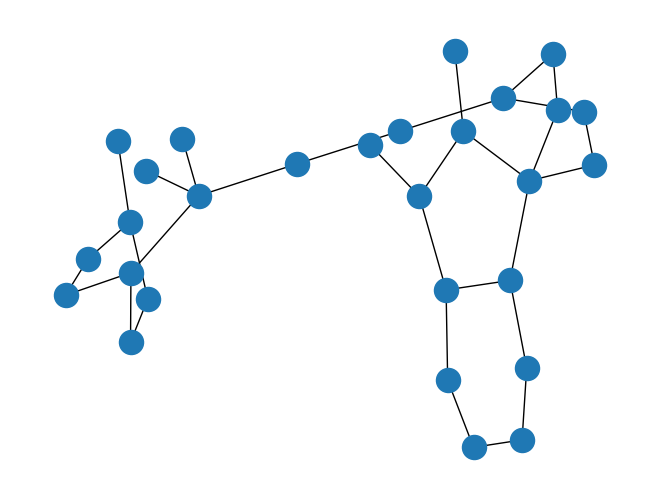

In [1]:
from datasets import load_dataset

# There is only one split on the hub
dataset = load_dataset("OGB/ogbg-molhiv")

dataset = dataset.shuffle(seed=0)

import networkx as nx
import matplotlib.pyplot as plt

# We want to plot the first train graph
graph = dataset["train"][0]

edges = graph["edge_index"]
num_edges = len(edges[0])
num_nodes = graph["num_nodes"]

# Conversion to networkx format
G = nx.Graph()
G.add_nodes_from(range(num_nodes))
G.add_edges_from([(edges[0][i], edges[1][i]) for i in range(num_edges)])

# Plot
nx.draw(G)


In [88]:
from transformers.models.graphormer.collating_graphormer import preprocess_item, GraphormerDataCollator

dataset_processed = dataset.map(preprocess_item, batched=False)


Map:   0%|          | 0/32901 [00:00<?, ? examples/s]


NameError: name 'algos_graphormer' is not defined

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("graph-ml", model="clefourrier/graphormer-base-pcqm4mv1")

In [ ]:
# Load model directly
from transformers import AutoTokenizer, GraphormerForGraphClassification

model = GraphormerForGraphClassification.from_pretrained("clefourrier/graphormer-base-pcqm4mv2")

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("graph-ml", model="clefourrier/graphormer-base-pcqm4mv2")

# ONNX -> PyG starts below

In [81]:
from conftest import IMAGE_MODELS, IMAGE_SEGMENTATION_MODELS
model = IMAGE_SEGMENTATION_MODELS[2]
model = IMAGE_MODELS[0]
import modlee
converter = modlee.converter.Converter()

onnx_graph = converter.torch_model2onnx_graph(model)

In [82]:
%load_ext autoreload
%autoreload 2
onnx_graph
# dir(onnx_graph)
# print(dir(onnx_graph))
import torch_geometric
import matplotlib.pyplot as plt
# ax = plt.axes([0,0,5,10])
import networkx as nx 
import onnx
from onnx.tools import net_drawer
# print(onnx_graph.node)
onnx_pydot = onnx.tools.net_drawer.GetPydotGraph(
    converter.onnx_parameterless2onnx(onnx_graph).graph)
onnx_pydot.set_name("onnx_graph")
onnx_nx = nx.nx_pydot.from_pydot(onnx_pydot)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ir_version: 8
opset_import {
  version: 17
}
producer_name: "pytorch"
producer_version: "2.3.0"
graph {
  node {
    input: "input_1"
    input: "onnx::Conv_193"
    input: "onnx::Conv_194"
    output: "/conv1/Conv_output_0"
    name: "/conv1/Conv"
    op_type: "Conv"
    attribute {
      name: "dilations"
      type: INTS
      ints: 1
      ints: 1
    }
    attribute {
      name: "group"
      type: INT
      i: 1
    }
    attribute {
      name: "kernel_shape"
      type: INTS
      ints: 7
      ints: 7
    }
    attribute {
      name: "pads"
      type: INTS
      ints: 3
      ints: 3
      ints: 3
      ints: 3
    }
    attribute {
      name: "strides"
      type: INTS
      ints: 2
      ints: 2
    }
  }
  node {
    input: "/conv1/Conv_output_0"
    output: "/relu/Relu_output_0"
    name: "/relu/Relu"
    op_type: "Relu"
  }
  node {
    input: "/relu/Relu_output_0"
    output: "/maxpool/MaxPool_output_0"
    name: "/maxpool/MaxPool"
    op_type: "MaxPool"
    attribut

In [83]:

# dir(onnx_nx)
import matplotlib as mpl
import copy
def filter_nodes(x):
    return 'onnx::' in x \
        or 'Identity' in x \
        or 'fc.' in x
tensor_nodes = [k for k in onnx_nx.nodes.keys() if filter_nodes(k)]
# help(onnx_nx.remove_node)
onnx_nx_layers_only = copy.deepcopy(onnx_nx)
for tensor_node in tensor_nodes:
    onnx_nx_layers_only.remove_node(tensor_node)
print(onnx_nx_layers_only.nodes)
# pc = mpl.collections.PatchCollection(edges, cmap=cmap)
# pc.set_array(edge_colors)
# ax.show()
plt.show()
dir(onnx_nx_layers_only.edges)
# print(onnx_nx_layers_only.edges.keys())
e0 = onnx_nx_layers_only.edges.items()
print(e0)
onnx_nx.is_directed()
# print(onnx_nx.selfloop_edges)
n0 = list(onnx_nx.nodes.items())[0]
# print(n0[1])


['/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', 'input_10', '/conv1/Conv_output_00', '/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', '/relu/Relu_output_00', '/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', '/maxpool/MaxPool_output_00', '/layer1/layer1.0/conv1/Conv/Conv (op#3)\\n input0 /maxpool/MaxPool_output_0\\n input1 onnx', '/layer1/layer1.0/conv1/Conv_output_00', '/layer1/layer1.0/relu/Relu/Relu (op#4)\\n input0 /layer1/layer1.0/conv1/Conv_output_0\\n output0 /layer1/layer1.0/relu/Relu_output_0', '/layer1/layer1.0/relu/Relu_output_00', '/layer1/layer1.0/conv2/Conv/Conv (op#5)\\n input0 /layer1/layer1.0/relu/Relu_output_0\\n input1 onnx', '/layer1/layer1.0/conv2/Conv_output_00', '/layer1/layer1.0/Add/Add (op#6)\\n input0 /layer1/layer1.0/conv2/Conv_output_0\\n input1 /maxpool/MaxPool_output_0\\n output0 /layer1/layer1.0/Add_output_0', '/layer1/layer1.0/Add_output_00', '/layer1/

['__abstractmethods__',
 '__and__',
 '__call__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_abc_impl',
 '_adjdict',
 '_from_iterable',
 '_graph',
 '_hash',
 '_nodes_nbrs',
 'data',
 'dataview',
 'get',
 'isdisjoint',
 'items',
 'keys',
 'values']

ItemsView(OutMultiEdgeView([('/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', '/conv1/Conv_output_00', 0), ('input_10', '/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', 0), ('/conv1/Conv_output_00', '/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', 0), ('/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', '/relu/Relu_output_00', 0), ('/relu/Relu_output_00', '/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', 0), ('/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', '/maxpool/MaxPool_output_00', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/conv1/Conv/Conv (op#3)\\n input0 /maxpool/MaxPool_output_0\\n input1 onnx', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/Add/Add (op#6)\\n input0 /layer1/layer1.0/conv2/Conv_output_0\\n input1 /maxpool/MaxPool_output_0\\n output0 /layer1/layer1.

True

In [5]:
onnx_nx_layers_only.edges

OutMultiEdgeView([('/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', '/conv1/Conv_output_00', 0), ('input_10', '/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', 0), ('/conv1/Conv_output_00', '/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', 0), ('/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', '/relu/Relu_output_00', 0), ('/relu/Relu_output_00', '/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', 0), ('/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', '/maxpool/MaxPool_output_00', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/conv1/Conv/Conv (op#3)\\n input0 /maxpool/MaxPool_output_0\\n input1 onnx', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/Add/Add (op#6)\\n input0 /layer1/layer1.0/conv2/Conv_output_0\\n input1 /maxpool/MaxPool_output_0\\n output0 /layer1/layer1.0/Add_outp

In [84]:
nodes_to_remove = []
for node_name, node_data in onnx_nx_layers_only.nodes.items():
    print(node_name)
    print(node_data)
    # if 'fontcolor' not in node_data:
    # if 'label' not in node_data:
    # if 'style' in node_data:
    #     nodes_to_remove.append(node_name)
        # onnx_nx_layers_only.remove_node(node_name)
    print('\n')

print(nodes_to_remove)
for node_to_remove in nodes_to_remove:
    onnx_nx_layers_only.remove_node(node_to_remove)
# n0 = onnx_nx.nodes[onnx_nx.nodes.keys()]
# edge_colors = range(2,onnx_nx_layers_only.number_of_edges()+2)


/conv1/Conv/Conv (op#0)\n input0 input_1\n input1 onnx
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}


input_10
{'label': '"input_1"', 'shape': 'octagon'}


/conv1/Conv_output_00
{'label': '"/conv1/Conv_output_0"', 'shape': 'octagon'}


/relu/Relu/Relu (op#1)\n input0 /conv1/Conv_output_0\n output0 /relu/Relu_output_0
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}


/relu/Relu_output_00
{'label': '"/relu/Relu_output_0"', 'shape': 'octagon'}


/maxpool/MaxPool/MaxPool (op#2)\n input0 /relu/Relu_output_0\n output0 /maxpool/MaxPool_output_0
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}


/maxpool/MaxPool_output_00
{'label': '"/maxpool/MaxPool_output_0"', 'shape': 'octagon'}


/layer1/layer1.0/conv1/Conv/Conv (op#3)\n input0 /maxpool/MaxPool_output_0\n input1 onnx
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}


/layer1/layer1.0/conv1/Conv_output_00
{'label'

[('/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', '/conv1/Conv_output_00', 0), ('input_10', '/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', 0), ('/conv1/Conv_output_00', '/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', 0), ('/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', '/relu/Relu_output_00', 0), ('/relu/Relu_output_00', '/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', 0), ('/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', '/maxpool/MaxPool_output_00', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/conv1/Conv/Conv (op#3)\\n input0 /maxpool/MaxPool_output_0\\n input1 onnx', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/Add/Add (op#6)\\n input0 /layer1/layer1.0/conv2/Conv_output_0\\n input1 /maxpool/MaxPool_output_0\\n output0 /layer1/layer1.0/Add_output_0', 0), ('/lay

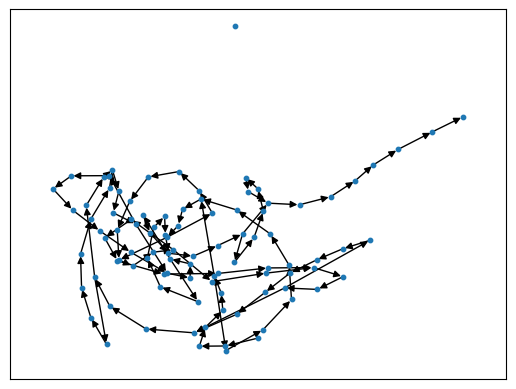

In [6]:

nx_drawing = nx.draw_networkx(onnx_nx_layers_only,
    pos=nx.spring_layout(onnx_nx_layers_only, seed=64),
    # pos=nx.bipartite_layout(onnx_nx),
    with_labels=False,
    node_size=10,
    # edge_color=edge_colors,
    # edge_cmap=plt.cm.plasma
    # ax=ax
)
print(onnx_nx_layers_only.edges)


In [7]:
dir(onnx_nx)
# dir(onnx_nx.nodes)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__networkx_cache__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 '_pred',
 '_succ',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_key_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'has_predecessor',
 'has_successor',
 'in_degree',
 'in_edges',
 'is_directed',
 'is_mult

In [8]:
for node_name, node_data in onnx_nx.nodes.items():
    # type(node_data)
    print(onnx_nx.nodes[node_name])

{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}
{'label': '"input_1"', 'shape': 'octagon'}
{'label': '"onnx::Conv_193"', 'shape': 'octagon'}
{'label': '"onnx::Conv_194"', 'shape': 'octagon'}
{'label': '"/conv1/Conv_output_0"', 'shape': 'octagon'}
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}
{'label': '"/relu/Relu_output_0"', 'shape': 'octagon'}
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}
{'label': '"/maxpool/MaxPool_output_0"', 'shape': 'octagon'}
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}
{'label': '"onnx::Conv_196"', 'shape': 'octagon'}
{'label': '"onnx::Conv_197"', 'shape': 'octagon'}
{'label': '"/layer1/layer1.0/conv1/Conv_output_0"', 'shape': 'octagon'}
{'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF'}
{'label': '"/layer1/layer1.0/relu/Relu_output_0"', 'shape': 'octagon'}
{'shape': 'box', 'color': '#0F9D58', 'styl

OutMultiEdgeView([('/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', '/conv1/Conv_output_00', 0), ('input_10', '/conv1/Conv/Conv (op#0)\\n input0 input_1\\n input1 onnx', 0), ('/conv1/Conv_output_00', '/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', 0), ('/relu/Relu/Relu (op#1)\\n input0 /conv1/Conv_output_0\\n output0 /relu/Relu_output_0', '/relu/Relu_output_00', 0), ('/relu/Relu_output_00', '/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', 0), ('/maxpool/MaxPool/MaxPool (op#2)\\n input0 /relu/Relu_output_0\\n output0 /maxpool/MaxPool_output_0', '/maxpool/MaxPool_output_00', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/conv1/Conv/Conv (op#3)\\n input0 /maxpool/MaxPool_output_0\\n input1 onnx', 0), ('/maxpool/MaxPool_output_00', '/layer1/layer1.0/Add/Add (op#6)\\n input0 /layer1/layer1.0/conv2/Conv_output_0\\n input1 /maxpool/MaxPool_output_0\\n output0 /layer1/layer1.0/Add_outp

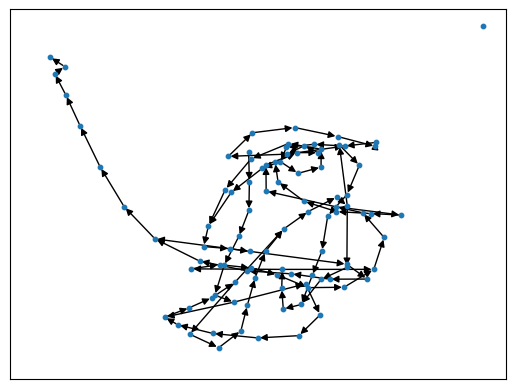

In [85]:
# import torch_geometric as pyg
import numpy as np
import torch_geometric as pyg
# print(pyg.__version__)
# dir(pyg)
# dir(torch_geometric.torch_geometric)
# from torch_geometric.utils import convert
onnx_test = copy.deepcopy(onnx_nx_layers_only)
# nx.set_node_attributes(onnx_test, None, "label")
edge_dict = {'shape': 'box', 'color': '#0F9D58', 'style': 'filled', 'fontcolor': '#FFFFFF', 'label': None}
for k in edge_dict.keys():
    # nx.set_node_attributes(onnx_test, None, k)
    # nx.set_node_attributes(onnx_test, np.random.rand(98)*100, k)
    nx.set_node_attributes(onnx_test, np.random.rand()*100, k)
    nx.set_node_attributes(onnx_test, np.random.rand()*100, f"edge_{k}")
# dir(onnx_test.edges.items()[0])
onnx_test.edges
# for edge_name,edge_data in onnx_test.edges.items():
#     print(edge_data)
# nx.get_edge_attributes(onnx_test)
nx.draw_networkx(onnx_test,
    with_labels=False,
        node_size=10,
    )
# for node,node_data in onnx_test.nodes.items():
#     print(node_data)
onnx_pyg = pyg.utils.convert.from_networkx(
    onnx_test,
    group_node_attrs=['label'],
    group_edge_attrs=['shape']
    )
# !ls
# onnx_pyg.label
# dir(onnx_pyg)
# onnx_pyg.fully_specify()
# onnx_pyg.x
# onnx_pyg.get_tensor()
# onnx_pyg.num_node_features

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# dir(onnx_pyg)
onnx_pyg.edge_attrs()
onnx_pyg.is_directed()
# onnx_pyg.num_nodes  
# onnx_pyg.num_node_features

NameError: name 'onnx_pyg' is not defined

In [11]:
from transformers import GraphormerForGraphClassification

model = GraphormerForGraphClassification.from_pretrained(
    "clefourrier/pcqm4mv2_graphormer_base",
    num_classes=1, # num_classes for the downstream task 
    ignore_mismatched_sizes=True,
)



/home/ubuntu/.conda/envs/modlee3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [34]:
model(onnx_pyg)

TypeError: GraphormerForGraphClassification.forward() missing 6 required positional arguments: 'input_edges', 'attn_bias', 'in_degree', 'out_degree', 'spatial_pos', and 'attn_edge_type'

In [6]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch_geometric.nn import GCNConv

from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
# dataset = DataLoader([onnx_pyg])

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = GCNConv(dataset.num_node_features, 16)
        # self.conv2 = GCNConv(16, dataset.num_classes)
        # self.conv1 = GCNConv(98, 16)
        # self.conv1 = GCNConv(98, 1)
        self.conv1 = GCNConv(1, 16)
        # self.conv2 = GCNConv(16, dataset.num_classes)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

gcn = GCN()


In [4]:
type(dataset)
type(onnx_pyg)

NameError: name 'dataset' is not defined

10556

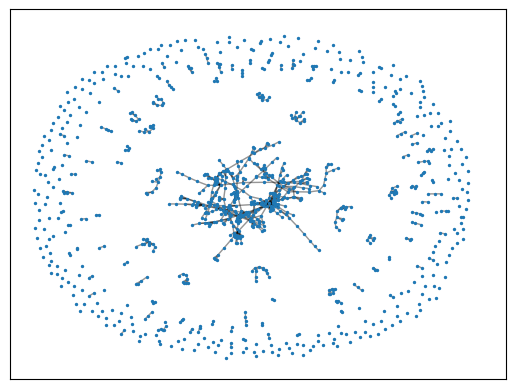

In [7]:
# dataset[0].__dict__
# dir(dataset[0])
# dataset=dataset[0]
len(dataset)
d0 = dataset[0]
# dir(d0)
d0.keys()
# d0.num_nodes
# d0.edge_index = d0.edge_index[...,:-4]
d0.num_node_features
d0.get_all_tensor_attrs()
d0.node_attrs()
d0.edge_attrs()
d0.edge_attr
len(d0.edge_index[0])
# d0.pos.shape
d0.x.shape
d0.y.shape
d0_nx = pyg.utils.convert.to_networkx(
    d0
)
d0_sub = d0_nx.subgraph(list(range(1000)))
layout_type = 'random'
layout_type = 'spectral'
layout_type = 'spring'
nx.draw_networkx(
    d0_sub,
    pos=getattr(nx, f"{layout_type}_layout")(d0_sub),
    font_color="white",
    # font_size=0,
    arrows=False,
    with_labels=False,
    node_size=2,
    edge_color=(0,0,0,0.23)
    )
# d0.x
# d0.edge_index
len(d0.edge_index[0])

AttributeError: 'GlobalStorage' object has no attribute 'min'

# CORA Citation network
Nodes are papers, edges are citations

In [9]:
# dir(pyg.nn.models)
# pyg_unet = pyg.nn.models.GraphUNet()
pyg_models = pyg.nn.models
for pyg_model in dir(pyg_models):
    # print(pyg_model)
    # dir(pyg_model)
    if 'pretrained' in ' '.join((dir(getattr(pyg_models,pyg_model)))):
        print(pyg_model)

DimeNet
DimeNetPlusPlus
SchNet


In [86]:
import argparse
import os.path as osp

import torch

from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric.nn import DimeNet, DimeNetPlusPlus

Model = DimeNetPlusPlus

# path = osp.join(osp.dirname(osp.realpath(__file__)), '..', 'data', 'QM9')
path = osp.join(osp.dirname(osp.abspath('')), '..', 'data', 'QM9')
qm9_dataset = QM9(path)


130831

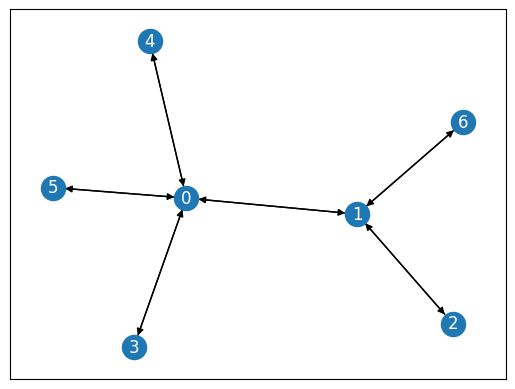

In [89]:
len(qm9_dataset)
q0 = pyg.utils.convert.to_networkx(qm9_dataset[10])
# # print(q0.node_attrs())
# for q in qm9_dataset[:10]:
    # print(q.x)
nx.draw_networkx(q0,
    font_color="white",
    )

# QM9 Quantum chemical properties

In [6]:

# DimeNet uses the atomization energy for targets U0, U, H, and G, i.e.:
# 7 -> 12, 8 -> 13, 9 -> 14, 10 -> 15
idx = torch.tensor([0, 1, 2, 3, 4, 5, 6, 12, 13, 14, 15, 11])
qm9_dataset.data.y = qm9_dataset.data.y[:, idx]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


/home/ubuntu/.conda/envs/modlee311/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)
/home/ubuntu/.conda/envs/modlee311/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemo

In [7]:

# for target in range(12):
for target in range(1):
    # Skip target \delta\epsilon, since it can be computed via
    # \epsilon_{LUMO} - \epsilon_{HOMO}:
    if target == 4:
        continue

    # model, datasets = pyg.nn.SchNet.from_qm9_pretrained(path, qm9_dataset, target)
    model, datasets = Model.from_qm9_pretrained(path, qm9_dataset, target)
    train_dataset, val_dataset, test_dataset = datasets

    model = model.to(device)
    loader = DataLoader(test_dataset, batch_size=2)

    maes = []
    for data in loader:
        data = data.to(device)
        with torch.no_grad():
            pred = model(data.z, data.pos, data.batch)
        mae = (pred.view(-1) - data.y[:, target]).abs()
        maes.append(mae)

    mae = torch.cat(maes, dim=0)

    # Report meV instead of eV:
    mae = 1000 * mae if target in [2, 3, 4, 6, 7, 8, 9, 10] else mae

    print(f'Target: {target:02d}, MAE: {mae.mean():.5f} ± {mae.std():.5f}')

Target: 00, MAE: 0.02975 ± 0.05869


Data(x=[19, 11], edge_index=[2, 40], edge_attr=[40, 4], y=[1, 12], pos=[19, 3], idx=[1], name='gdb_114631', z=[19])

Data(x=[21, 11], edge_index=[2, 42], edge_attr=[42, 4], y=[1, 12], pos=[21, 3], idx=[1], name='gdb_102124', z=[21])

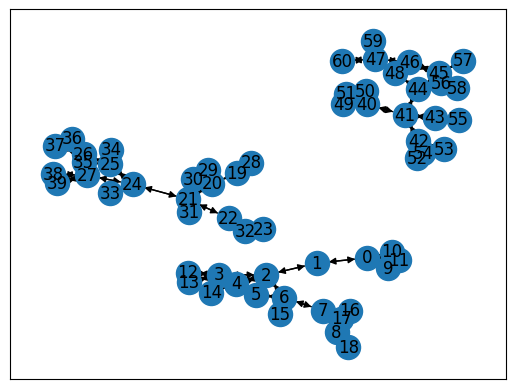

In [112]:
x_tr = next(iter(DataLoader(train_dataset,batch_size=3)))
x_tr[0]
x_tr[1]
nx.draw_networkx(pyg.utils.convert.to_networkx(x_tr))

110000

Data(x=[19, 11], edge_index=[2, 40], edge_attr=[40, 4], y=[1, 12], pos=[19, 3], idx=[1], name='gdb_73196', z=[19])

11

torch.Size([19])
torch.Size([19, 3])
None


tensor([2.9526], device='cuda:0', grad_fn=<SumBackward1>)

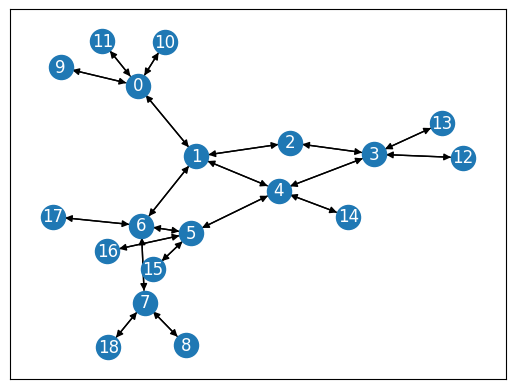

In [106]:
# x_tr0 = train_dataset[0]
import random
from random import shuffle
len(train_dataset)
x_tr0 = random.choice(train_dataset)
# dir(x_tr0)
x_tr0
x_tr0.num_features
nx.draw_networkx(pyg.utils.convert.to_networkx(x_tr0), font_color="white")
#_tr0.z
# x_tr0.pos
print(x_tr0.z.shape)
print(x_tr0.pos.shape)
print(x_tr0.batch)
bs = 10
z_dummy = torch.randint(low=0,high=7,size=(bs,))
model(
    z_dummy.to(device),
    # torch.randint((bs),dtype=torch.int64).to(device),
    torch.randn((bs,3)).to(device),
    None
)

In [9]:
model(qm9_dataset[0])

TypeError: DimeNet.forward() missing 1 required positional argument: 'pos'

In [2]:
# !pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git



Found existing installation: torch_cluster 1.6.3+pt23cu121
Uninstalling torch_cluster-1.6.3+pt23cu121:
  Successfully uninstalled torch_cluster-1.6.3+pt23cu121
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcu121/torch_scatter-2.1.2%2Bpt23cu121-cp311-cp311-linux_x86_64.whl (10.9 MB)
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcu121/torch_sparse-0.6.18%2Bpt23cu121-cp311-cp311-linux_x86_64.whl (5.1 MB)
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcu121/torch_cluster-1.6.3%2Bpt23cu121-cp311-cp311-linux_x86_64.whl (3.4 MB)
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-ahx80o9k
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-ahx80o9k
  Resolved https://github.c

In [14]:
torch.cuda.is_available()

True

In [13]:
torch.__version__

'2.3.0+cu121'

In [18]:
# dataset[0].num_node_features
dataset[0].edge_index
# dataset[0].num_features
# dataset[0].x
onnx_pyg.edge_index
# onnx_pyg.x
type(dataset[0]); type(onnx_pyg)
onnx_pyg.x.max()
onnx_pyg.num_nodes
# onnx_pyg.num_node_features = onnx_pyg.num_nodes
onnx_pyg.num_node_features
# [onnx_pyg].num_node_features
# type(dataset)
# help(torch_geometric.datasets)
# gcn(dataset[0])
# pyg_data = onnx_pyg.unsqueeze(-1)
BATCH_SIZE = 32
class PyGDataset(torch.utils.data.Dataset):
    def __init__(self, *args, **kwargs):
        pass
    
    def __len__(self):
        return BATCH_SIZE
    
    def __getitem__(self, idx):
        return onnx_pyg


pyg_dataset = DataLoader(PyGDataset(), batch_size=BATCH_SIZE)
# pyg_batch = next(iter(pyg_dataset))
# [torch.Tensor(onnx_pyg)]*10
# onnx_pyg*10
pyg_batch_list = pyg.data.Batch.from_data_list([onnx_pyg]*32)
gcn_out = gcn(pyg_batch_list)
# gcn_out = gcn(torch.Tensor(onnx_pyg))
gcn_out.shape
gcn_out

tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]])

tensor([[ 0,  1,  2,  3,  4,  5,  6,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 35, 36, 37, 38, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 48,
         49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 60, 61, 62, 63, 64, 65,
         66, 67, 68, 69, 70, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
         82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95],
        [ 2,  0,  3,  4,  5,  6,  7, 13,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         23, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 33, 28, 29, 30, 31, 32, 35,
         34, 35, 36, 37, 38, 39, 45, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 55,
         50, 51, 52, 53, 54, 57, 56, 57, 58, 59, 60, 61, 67, 62, 63, 64, 65, 66,
         67, 68, 69, 70, 71, 77, 72, 73, 74, 75, 76, 79, 78, 79, 80, 81, 82, 83,
         89, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]])

torch_geometric.data.data.Data

torch_geometric.data.data.Data

tensor(26.0092)

98

1

torch.Size([3136, 1])

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], grad_fn=<LogSoftmaxBackward0>)

In [21]:
gcn.state_dict()

OrderedDict([('conv1.bias',
              tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),
             ('conv1.lin.weight',
              tensor([[ 0.5536],
                      [ 0.4515],
                      [ 0.1517],
                      [ 0.1280],
                      [-0.4234],
                      [-0.1719],
                      [ 0.0205],
                      [-0.0393],
                      [-0.2873],
                      [-0.4439],
                      [ 0.2626],
                      [-0.4273],
                      [ 0.3111],
                      [-0.2833],
                      [-0.4877],
                      [-0.0323]])),
             ('conv2.bias', tensor([0.])),
             ('conv2.lin.weight',
              tensor([[ 0.4128, -0.3554,  0.3761,  0.0908,  0.5294, -0.2882,  0.5177,  0.0157,
                       -0.4300, -0.5166, -0.0143,  0.4755, -0.2374,  0.2138, -0.1969, -0.5427]]))])

# ONNX -> PyDot -> NetworkX -> PyG

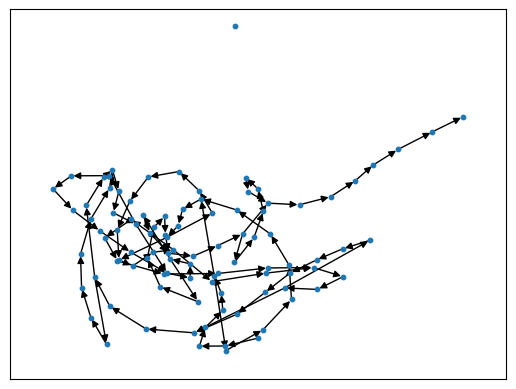

In [302]:
onnx_pyg_nx = pyg.utils.convert.to_networkx(
    onnx_pyg,
    
)

nx.draw_networkx(onnx_pyg_nx,
    pos=nx.spring_layout(onnx_pyg_nx, seed=64),
    with_labels=False,
    node_size=10)

# for node_name, node_data in onnx_pyg_nx.nodes.items():
#     print(node_data)

## Graph from ONNX -> PyDot -> NetworkX

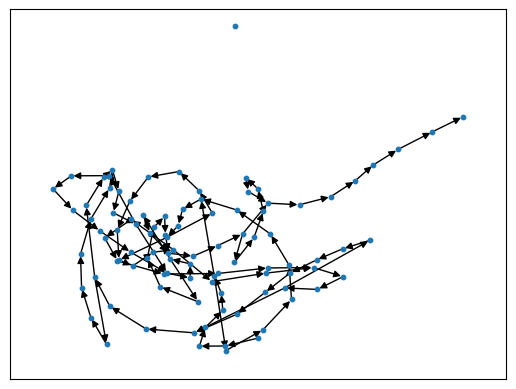

In [142]:

nx.draw_networkx(onnx_pyg_nx,
    pos=nx.spring_layout(onnx_pyg_nx, seed=64),
    with_labels=False,
    node_size=10)

## Graph from ONNX -> PyDot -> NetworkX -> PyG -> NetworkX